In [1]:
import numpy as np
import pandas as pd

In [4]:
col_names=['user_id','movie_id','rating','time_Stamp']
movies_df=pd.read_csv(r"C:\Users\vkondala\Desktop\ML\Recommender systems\ml-100k\ml-100k\u.data",sep='\t',
                     names=col_names)

In [5]:
movies_df.head()

,user_id,movie_id,rating,time_Stamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [14]:
col_names=['movie_id','movie_name']
items_df=pd.read_csv(r"C:\Users\vkondala\Desktop\ML\Recommender systems\ml-100k\ml-100k\items.csv",names=col_names)

In [15]:
items_df.head()

,movie_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
df=pd.merge(movies_df,items_df,on ='movie_id')
df.head()

,user_id,movie_id,rating,time_Stamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [19]:
df.groupby('movie_name')['rating'].mean().sort_values(ascending=False).head()

movie_name
Prefontaine (1997)                            5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
They Made Me a Criminal (1939)                5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [20]:
df.groupby('movie_name')['rating'].count().sort_values(ascending=False).head()

movie_name
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [24]:
ratings=pd.DataFrame(df.groupby('movie_name')['rating'].mean())
ratings.head()

,rating
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [25]:
ratings['no of ratings']=pd.DataFrame(df.groupby('movie_name')['rating'].count())
ratings.head()

,rating,no of ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


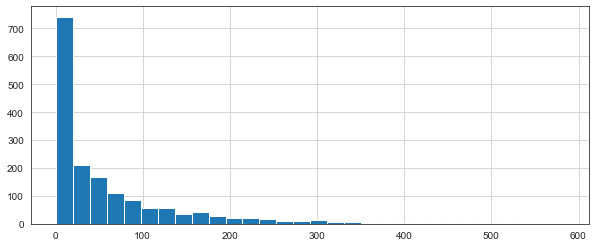

In [32]:
plt.figure(figsize=(10,4))
ratings['no of ratings'].hist(bins=30)

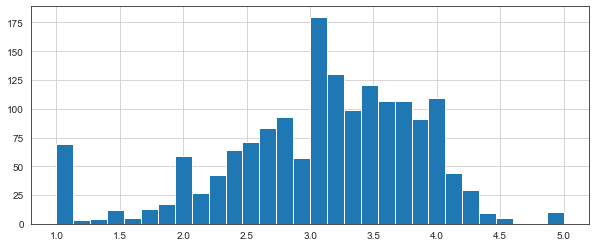

In [34]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=30)

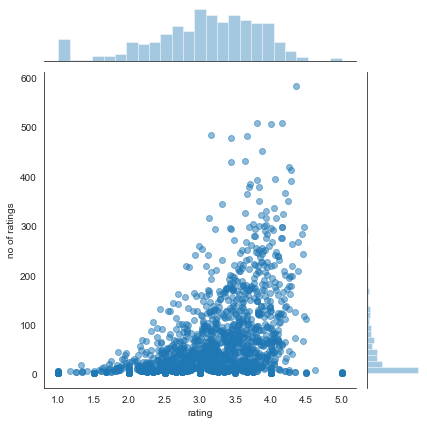

In [35]:
sns.jointplot(x='rating',y='no of ratings',data=ratings,alpha=0.5)

In [37]:
movie_pivot=df.pivot_table(index='user_id',columns='movie_name',values='rating')
movie_pivot.head()

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),20,2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),39 Steps,...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Poisoner's Handbook,Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [39]:
ratings.sort_values('no of ratings',ascending=False).head(10)

,rating,no of ratings
movie_name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
English Patient,3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [40]:
starwars_user_rating=movie_pivot['Star Wars (1977)']
LiarLiar_user_rating=movie_pivot['Liar Liar (1997)']
starwars_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

# finding correlation among movies

In [42]:
similar_to_starwars=movie_pivot.corrwith(starwars_user_rating)
similar_to_LiarLiar=movie_pivot.corrwith(LiarLiar_user_rating)

C:\Users\vkondala\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\vkondala\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [43]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [44]:
corr_LiarLiar=pd.DataFrame(similar_to_LiarLiar,columns=['correlation'])
corr_LiarLiar.dropna(inplace=True)
corr_LiarLiar.head()

,correlation
movie_name,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [46]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
movie_name,
Man of the Year (1995),1.0
Commandments (1997),1.0
Cosi (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Hollow Reed (1996),1.0
No Escape (1994),1.0
Outlaw,1.0
Ed's Next Move (1996),1.0


In [49]:
corr_starwars[ratings['no of ratings']>100].sort_values('correlation',ascending=False).head()

<ipython-input-49-80465b548396>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_starwars[ratings['no of ratings']>100].sort_values('correlation',ascending=False).head()


,correlation
movie_name,
Star Wars (1977),1.000000
Empire Strikes Back,0.747981
Return of the Jedi (1983),0.672556
Raiders of the Lost Ark (1981),0.536117
Austin Powers: International Man of Mystery (1997),0.377433


In [50]:
corr_LiarLiar[ratings['no of ratings']>100].sort_values('correlation',ascending=False).head()

<ipython-input-50-f6ae8a84ac9a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_LiarLiar[ratings['no of ratings']>100].sort_values('correlation',ascending=False).head()


,correlation
movie_name,
Liar Liar (1997),1.000000
Batman Forever (1995),0.516968
Mask,0.484650
Down Periscope (1996),0.472681
Con Air (1997),0.469828
